In [1]:
# Import required packages
import jax
import numpy as np
import jax.numpy as jnp
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [31]:
import learning.module.normalizing_flow as nf

K= 16
flows = []
for i in range(K):
    flows += [nf.flows.Planar((2,), activation=jax.nn.leaky_relu)]
target = nf.distributions.TwoModes(2,0.1)
rng = jax.random.PRNGKey(0)
q0 = nf.distributions.DiagGaussian((2,))
nfm = nf.NormalizingFlow(q0=q0, flows=flows, p=target)
rng_params = jax.random.PRNGKey(0)
x0 = jnp.zeros((8, 2))   # any batch size; shape must be (N, 2)
params = nfm.init(rng_params, mode='log_prob', x=x0)

# Use it
key_sample = jax.random.PRNGKey(1)
x, log_q = nfm.apply(params, mode='sample', num_samples=1024, rng=key_sample)
lp = nfm.apply(params, mode='log_prob', x=jnp.ones((4, 2)))
fkld = nfm.apply(params, mode='forward_kld', x=jax.random.normal(jax.random.PRNGKey(2), (128, 2)))
rkld = nfm.apply(params, mode='inverse_kld', num_samples=512)

NameError: name 'jnn' is not defined

In [24]:
params

{}

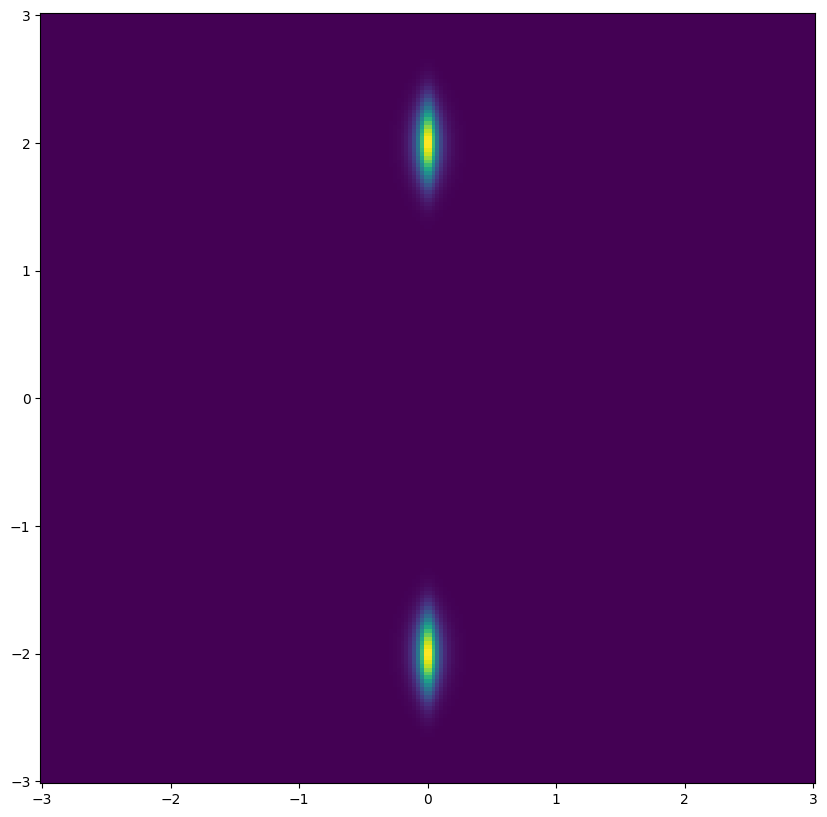

ScopeParamNotFoundError: Could not find parameter named "loc" in scope "/q0". (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ScopeParamNotFoundError)

In [20]:
grid_size = 200
lin = jnp.linspace(-3.0, 3.0, grid_size)
xx, yy = jnp.meshgrid(lin, lin, indexing="xy")          # (G, G)
z_grid = jnp.stack([xx, yy], axis=-1)                   # (G, G, 2)

log_prob = target.log_prob(z_grid)                      # (G, G)
prob = jnp.exp(log_prob)

plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, prob)
plt.show()

# Plot initial flow distribution
sample_key, rng = jax.random.split(rng)
z, _ = nfm.apply(params,  rng=sample_key, mode="sample", num_samples=2 ** 20)
z_np = z.to('cpu').data.numpy()
plt.figure(figsize=(10, 10))
plt.hist2d(z_np[:, 0].flatten(), z_np[:, 1].flatten(), (grid_size, grid_size), range=[[-3, 3], [-3, 3]])
plt.show()